In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_excel("Airlines+Data.xlsx",index_col=0, parse_dates=True)

<Axes: xlabel='Month'>

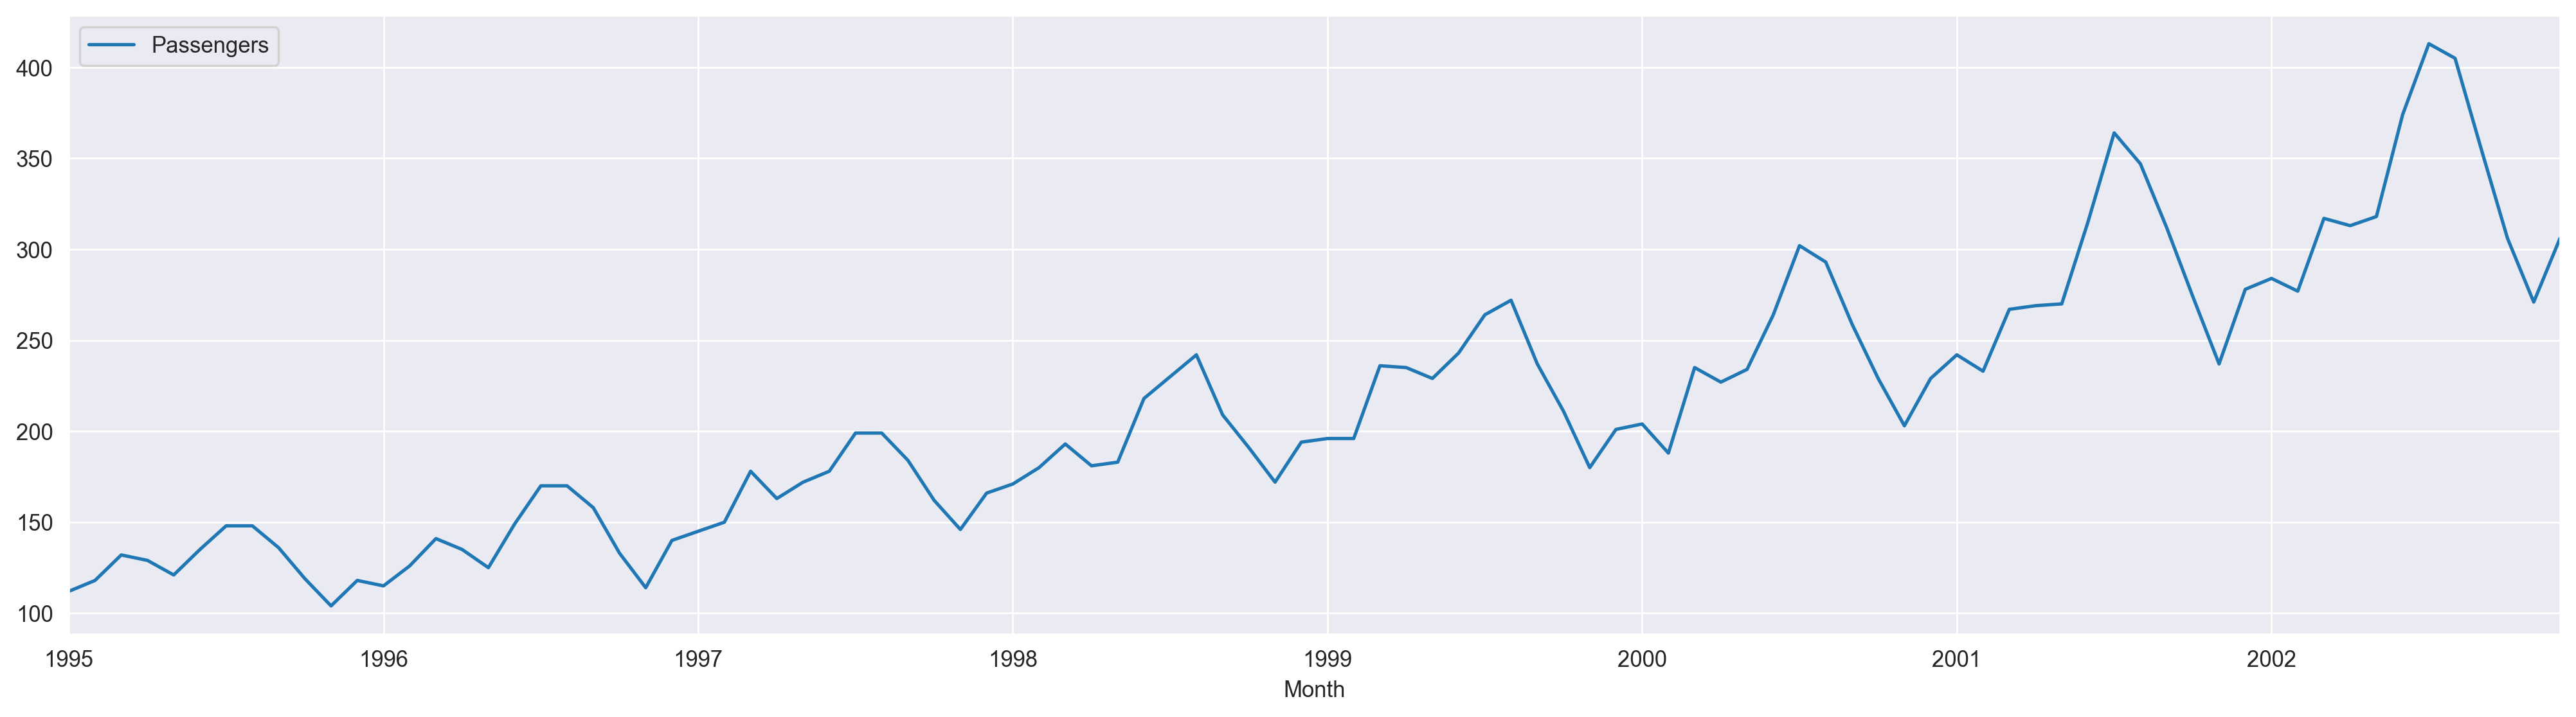

In [3]:
df.plot()

In [4]:
df['First'] = df['Passengers'].diff(periods=1)

In [5]:
df.dropna(inplace=True)

In [6]:
df

,Passengers,First
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [7]:
data = df.drop(columns='Passengers')

In [8]:
data['log_First'] =np.log(data['First'])
data['log_First']

Month
1995-02-01    1.791759
1995-03-01    2.639057
1995-04-01         NaN
1995-05-01         NaN
1995-06-01    2.639057
                ...   
2002-08-01         NaN
2002-09-01         NaN
2002-10-01         NaN
2002-11-01         NaN
2002-12-01    3.555348
Name: log_First, Length: 95, dtype: float64

In [9]:
data

,First,log_First
Month,,
1995-02-01,6.0,1.791759
1995-03-01,14.0,2.639057
1995-04-01,-3.0,NaN
1995-05-01,-8.0,NaN
1995-06-01,14.0,2.639057
...,...,...
2002-08-01,-8.0,NaN
2002-09-01,-50.0,NaN
2002-10-01,-49.0,NaN


In [10]:
data.isnull().sum()

First         0
log_First    41
dtype: int64

In [11]:
data['log_First'].fillna(method='ffill', inplace=True)

In [12]:
data

,First,log_First
Month,,
1995-02-01,6.0,1.791759
1995-03-01,14.0,2.639057
1995-04-01,-3.0,2.639057
1995-05-01,-8.0,2.639057
1995-06-01,14.0,2.639057
...,...,...
2002-08-01,-8.0,3.663562
2002-09-01,-50.0,3.663562
2002-10-01,-49.0,3.663562


In [13]:
data.isnull().sum()

First        0
log_First    0
dtype: int64

In [14]:
train = data.iloc[:-30]
test = data.iloc[-30:]

In [15]:
import statsmodels.formula.api as smf 

In [16]:
Mul_Add_sea = smf.ols('log_First~First',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['First'], pred_Mult_add_sea))
rmse_Mult_add_sea 

ValueError: Input contains NaN.